# Data Science UCSB Intermediate Pipeline Week 4: Linear and Polynomial Regression

Over the past few weeks, you should have:
- Selected your response and predictor variables
- Train and test split
- Tidied the data set (if necessary)
- Handled missing values in the data

Now, we will take our work and fit a linear regression model to our data.

In this notebook, you will:
- Fit a linear regression model to your training data
- Evaluate how well the model performs on the test data

## Importing the Dataset and Our Work So Far

Copy and paste your code from the past couple weeks here in order to bring over the cleaned and tidied dataset and train and test splits.

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, altair as alt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
from IPython.display import clear_output
clear_output()

!git clone https://github.com/grant-cai/crimedata
!ls crimedata

df = pd.read_csv("crimedata/crimedata.csv", na_values = ["?"])

df.head()

# Your code here

fatal: destination path 'crimedata' already exists and is not an empty directory.
crimedata.csv desc.txt


communityname state  countyCode  communityCode  fold  population  \
0  BerkeleyHeightstownship    NJ        39.0         5320.0     1       11980   
1           Marpletownship    PA        45.0        47616.0     1       23123   
2               Tigardcity    OR         NaN            NaN     1       29344   
3         Gloversvillecity    NY        35.0        29443.0     1       16656   
4              Bemidjicity    MN         7.0         5068.0     1       11245   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  burglaries  \
0           3.10          1.37         91.78          6.50  ...        14.0   
1           2.82          0.80         95.57          3.44  ...        57.0   
2           2.43          0.74         94.33          3.43  ...       274.0   
3           2.40          1.70         97.35          0.50  ...       225.0   
4           2.76          0.53         89.16          1.17  ...        91.0   

   burglPerPop  larcenies  larcPerPop  autoTheft  autoTheftPerPop  arsons  \
0       114.85      138.0     1132.08       16.0           131.26     2.0   
1       242.37      376.0     1598.78       26.0           110.55     1.0   
2       758.14     1797.0     4972.19      136.0           376.30    22.0   
3      1301.78      716.0     4142.56       47.0           271.93     NaN   
4       728.93     1060.0     8490.87       91.0           728.93     5.0   

   arsonsPerPop  ViolentCrimesPerPop  nonViolPerPop  
0         16.41                41.02        1394.59  
1          4.25               127.56        1955.95  
2         60.87               218.59        6167.51  
3           NaN               306.64            NaN  
4         40.05                  NaN        9988.79  

[5 rows x 147 columns]

In [5]:
test_isnull = df.isnull()
test_isnull.mean()

communityname          0.000000
state                  0.000000
countyCode             0.551242
communityCode          0.552596
fold                   0.000000
                         ...   
autoTheftPerPop        0.001354
arsons                 0.041084
arsonsPerPop           0.041084
ViolentCrimesPerPop    0.099774
nonViolPerPop          0.043792
Length: 147, dtype: float64

# Multiple Linear Regression in Python

We will be using SciKit Learn to fit a linear regression model to our train and test data.

To read the documentation and familiarize yourself with the package, go here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

It would also be constructive to Google `LinearRegression in SciKit Learn` as well to familiarize yourself with how it is used.

With this new knowledge, first split the train and test data into their predictors, `Xtrain` and `Xtest`, as well as their respective responses, `Ytrain` and `Ytest`. For future ease of use, it might be ideal to subset `Xtrain` and `Xtest` with only the variables you plan on using for your analysis.

In [133]:
#Xtrain = ...
#Xtest = ...

#Ytrain = ...
#Ytest = ...

df1 = df[['NumUnderPov']]
x = df1[df['NumUnderPov'] < 500000]
x = x.iloc[:-2]
 
df2 = df[['burglaries']]
y = df2[df['burglaries'] < 50000]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 4)

x_train = x_train.dropna()
y_train = y_train.dropna()
x_test = x_test.dropna()
y_test = y_test.dropna()

#x_train = df[["medIncome"]]
#y_train = df[["burglaries"]]
#x_test = df[['medIncome']]
#y_test = df[['burglaries']]

#y_train = y_train.query("burglaries == burglaries")
#x_train = x_train.iloc[:-2]
#x_test = x_test.iloc[:-1]


#x_train = x_train.sort_values(by =['medIncome'])



#x_train = np.array(x_train).reshape(-1,1)
#y_train = np.array(x_train).reshape(-1,1)

#x_test = np.array(x_train).reshape(-1,1)
#y_test = np.array(x_train).reshape(-1,1)

#Option 1 - Reshaping to (-1,1)
#X = np.array(X).reshape(-1,1)
#Option 2 - Getting as a dataframe
#X = df.iloc[:, :-1].values
#Option 3 - Getting as a dataframe
#X = df[["X"]]


In [137]:
y_test.shape

(553, 1)

In [82]:
ytrain_isnull = y_train.isnull()
ytrain_isnull.mean()

burglaries    0.0
dtype: float64

In [81]:
xtrain_isnull = x_train.isnull()
xtrain_isnull.mean()

NumUnderPov    0.0
dtype: float64

In [21]:
x_train

2038    20427
1297    19193
220     21174
1314    76907
1975    25291
        ...  
1071    23044
433     46057
674     44004
1099    25153
1608    39618
Name: medIncome, Length: 1550, dtype: int64

Create `model` using the `LinearRegression().fit()` function from the package, utilizing your `Xtrain` and `Ytrain` dataframes:

In [129]:
model = LinearRegression().fit(x_train, y_train)

Run the following to determine your R-squared value and coefficients:

In [138]:
r_sq = model.score(x_train, y_train)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"coefficients: {model.coef_}")

coefficient of determination: 0.04827122013323282
intercept: [624.92737175]
coefficients: [[0.01526273]]


Text(0, 0.5, 'Burglaries')

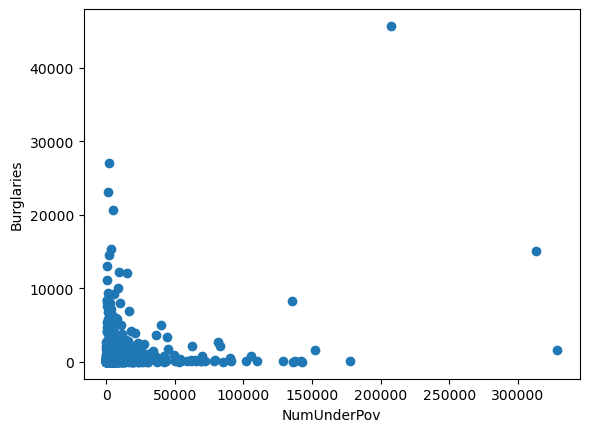

In [139]:
plt.scatter(x_train, y_train)
plt.xlabel('NumUnderPov')
plt.ylabel('Burglaries')

In [123]:
df1 = df[['NumUnderPov']]
x = df1[df['NumUnderPov'] < 500000]
x 

NumUnderPov
0             227
1             885
2            1389
3            2831
4            2855
5           23223
6            1126
7           10320
8            9603
9           27767
10           4698
11           4689
12           8759
13          15283
14            863
15           1874
16           1262
17          25484
18            340
19          21272
20           1681
22           2328
23            728
24            904
25           2120
26            460
27          11184
28           1680
29           6410
30           4173
31          45126
32           2756
33            436
34           1661
35           1486
36           3699
37            973
38          14232
39            713
40          14737
41           4626
42          18222
43           8864
44           2504
45           2470
46           1411
47           4767
48           4498
49            746
50           3398
51           2105
52            373
53           5667
54          62426
55         313374
56           3335
57           1977
58           9889
59           1974
60           4922
61           7771
62           1174
63           1323
64           1165
65           1632
66           1116
67           1322
68          32189
69            903
70           3154
71            313
72            513
73           2257
74           3141
75           2494
76            968
77           3325
78          79287
79            927
80           2689
81           1659
82            838
83            687
84           1522
85           1343
86           1560
87            278
88           2711
89            637
90          62058
91           1028
92           6791
93            392
94           5328
95            771
96            193
97            684
98           6526
99          25481
100          2657
101          1162
102           249
103          2468
104          2113
105          5232
106          4493
107          1220
108          6325
109          1103
110           794
111          1160
112          1413
113         25518
114           687
115          3066
116          1176
117           481
118           431
119          4265
120          3727
121           786
122         13999
123          1969
124          4578
125          1382
126          2603
128          1515
129           750
130          4450
131          3443
132           762
133          4019
134          1226
135         13195
136          1991
137          2529
138           672
139          6308
140         29863
141          2040
142          2965
143          7309
144           862
145         15624
146          1113
147          2610
148          1669
149           351
150         10513
151           827
152         42218
153          7561
154          7908
155          4072
156           227
157          1471
158          8996
159           470
160          1154
161           900
162          1001
163          1060
164         10092
165          1763
166         52557
167        177790
168          2197
169          8033
170          2749
171          2542
172          1320
173         14857
174          5036
175         13909
176          2842
177          1657
178           911
179          5512
180          8233
181           617
182         10670
183          1120
184           595
185         11044
186          8614
187           495
188           425
189          2436
190           472
191          2049
192           159
193          5071
194          1420
195         69694
196         13578
197          2747
198          6278
199          2437
200          4087
201           266
202          3305
203          1802
204          8947
205         69096
206          2188
207          5546
208          1691
209           688
210          6201
211          7257
212           904
213           628
214          2827
215          1076
216          2637
217           246
218          6902
219          2595
220          7877
221          2511
222          3388
223       

In [140]:
model.predict(x_test)

array([[ 670.62398974],
       [1149.99585941],
       [ 631.73454998],
       [ 634.54289257],
       [ 945.61262244],
       [ 631.18509165],
       [ 638.72488099],
       [ 658.88694925],
       [ 670.89871891],
       [ 827.37224183],
       [ 710.64287163],
       [ 831.0963483 ],
       [ 650.8587525 ],
       [ 730.59126164],
       [ 708.00241908],
       [ 632.17716919],
       [ 661.57318999],
       [ 656.20070851],
       [ 808.40066662],
       [ 650.66033699],
       [ 630.57458239],
       [ 715.51168296],
       [ 688.23718184],
       [ 634.17658702],
       [ 675.88963209],
       [ 666.3351622 ],
       [ 629.7046067 ],
       [ 778.95885764],
       [ 640.31220506],
       [ 780.65302083],
       [ 665.35834739],
       [ 771.49538195],
       [ 656.68911592],
       [1422.20667499],
       [ 638.02279534],
       [ 779.8135706 ],
       [ 702.38573391],
       [ 645.11996547],
       [ 635.41286826],
       [ 632.81820392],
       [ 698.86004294],
       [ 671.493

In [141]:
model.score(x_test, y_test)

0.03697600162192316

What was your coefficient of determination? How well did your model perform?

_Your answer here_

## Advanced Linear Regression with `statsmodels`

For more detailed summaries of our linear regression models, we can utilize the `statsmodels` package:

In [142]:
import statsmodels.api as sm

You need to add the column of ones to the inputs if you want statsmodels to calculate the intercept 𝑏₀. It doesn’t take 𝑏₀ into account by default. This is just one function call:

In [143]:
x = sm.add_constant(x_train)

The regression model based on ordinary least squares is an instance of `statsmodels.regression.linear_model.OLS`. We can create a model as follows:

In [144]:
model2 = sm.OLS(y_train, x)

results = model2.fit()

ValueError: The indices for endog and exog are not aligned

By calling `.fit()`, we get a `results` variable which tells us a lot more about the model we created, including the R-squared, Adjusted R-squared, etc. This is very useful for us to know our model better.

In [145]:
print(results.summary())

NameError: name 'results' is not defined

## Polynomial Regression

Depending on the predictors and/or response that you chose to analyze, OLS with linear relationships between the predictors and response might not have produced satisfactory results. That's why it's important for us to look at how our predictors behave in relation to our response. That's where polynomial regression comes in.

Utilize `PolynomialFeature` in `sklearn` to see if you can improve your coefficient of determination. `PolynomialFeature` will work with both `sklearn` and the `statsmodels` methods, but how they're implemented differs slightly. It would be helpful to research these differences.

Evaluate if polynomial regression improved your model fit. Be careful though; if you crank up the degree of the polynomial, there's a chance that you'll overfit your data!

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# your code here

## Conclusion

You now know how to perform linear regression in Python, using both `sklearn` and `statsmodels`! Recall that we utilize `sklearn` when we are less concerned with detail and want to use the approach more consistent with other regression techniques and `statsmodels` for a more detailed OLS regression with advanced statistical parameters.